# Seal Detection Model

## Load Model

In [4]:
%matplotlib inline
%load_ext tensorboard

import torch
import os
from tools.image import cv
from checkpoint import load_model
from evaluate import evaluate_image
from detection import display, detection_table
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
import random

out_dir = "./log/Seals"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
model, encoder, args = load_model(f"{out_dir}/model.pth")
device = torch.cuda.current_device()
model.to(device)
encoder.to(device)

classes = args.dataset.classes

def show(input, threshold=0.5):

    frame = cv.imread_color(input)

    nms_params = detection_table.nms_defaults._extend(nms = threshold)
    # pprint_struct(nms_params)

    results = evaluate_image(model, frame, encoder, nms_params = nms_params, device=device)

    d, p = results.detections, results.prediction
    detections = list(zip(d.index, d.label, d.bbox, d.confidence))
    predictions = list(zip(p[0], p[1]))

    for index, label, bbox, confidence in detections:
        if confidence > threshold:
            label_class = classes[label]
            display.draw_box(frame, bbox, confidence=confidence, scale=1.0,
                name=label_class.name, color=display.to_rgb(label_class.colour))

    h, w = frame.shape[:2]
    scale = 7

    plt.figure(figsize = (w/h*scale, scale))
    plt.imshow(frame, interpolation='nearest')
    plt.show()

/home/fdi19/miniconda3/envs/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/fdi19/miniconda3/envs/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Demonstration

## Scott Base

### 2019-20

Camera: CameraB
Image: D4049.jpg


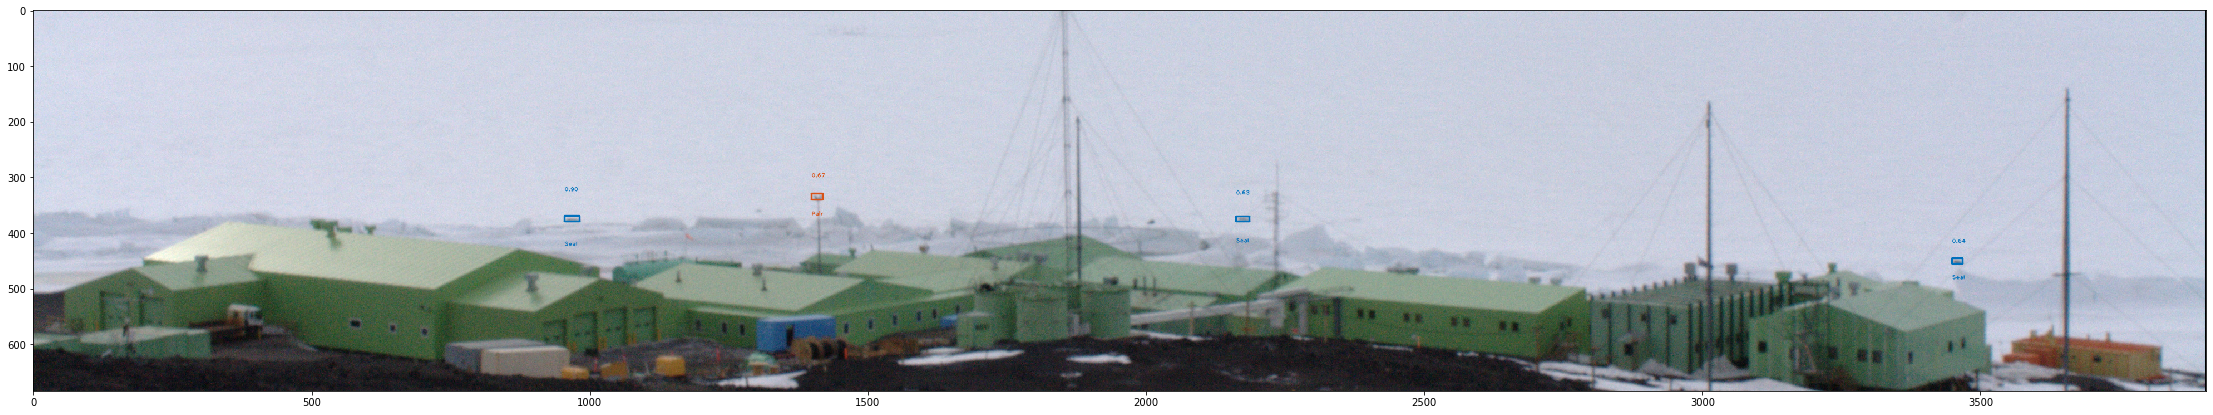

In [7]:
scott_base_2019 = "/home/fdi19/SENG402/data/images/scott_base/2019-20/"
camera = random.choice(os.listdir(scott_base_2019))
image = random.choice(os.listdir(scott_base_2019 + camera))
path = os.path.join(scott_base_2019, camera, image)
print(f'Camera: {camera}\nImage: {image}')
show(path)

### 2021-22

Image: 2021-12-08T09_32_45.jpg


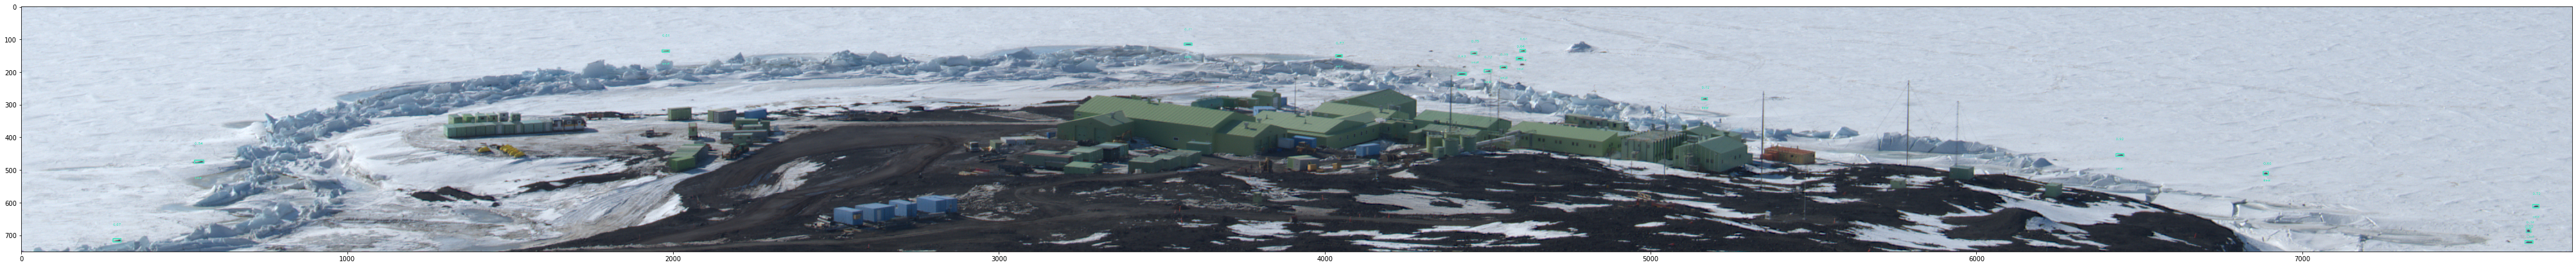

In [8]:
scott_base_2021 = "/home/fdi19/SENG402/data/images/scott_base/2021-22/"
image = random.choice(os.listdir(scott_base_2021))
path = os.path.join(scott_base_2021, image)
print(f'Image: {image}')
show(path)

# TensorBoard

In [2]:
tb_dir = f"{out_dir}/tensorboard"
%tensorboard --logdir $tb_dir

Reusing TensorBoard on port 6007 (pid 46377), started 0:11:30 ago. (Use '!kill 46377' to kill it.)